In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv("C:\\Users\\11828\\Downloads\\train_F3fUq2S.csv")
test = pd.read_csv("C:\\Users\\11828\\Downloads\\test_Bk2wfZ3.csv")
ss = pd.read_csv("C:\\Users\\11828\\Downloads\\sample_submission_LJ2N3ZQ.csv")

train.shape , test.shape

((1888, 22), (762, 21))

In [ ]:
train.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [ ]:
train.nunique()

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

In [ ]:
# View Distribution of column data
for col in list(train.columns):
    print(train[col].value_counts())

2       1
621     1
645     1
643     1
641     1
       ..
1252    1
1250    1
1248    1
1246    1
1887    1
Name: campaign_id, Length: 1888, dtype: int64
3     1559
10     181
15      89
6       22
9       13
11       7
14       7
0        3
12       3
7        2
1        1
2        1
Name: sender, dtype: int64
77     53
85     42
82     40
80     39
86     39
       ..
169     1
171     1
174     1
177     1
265     1
Name: subject_len, Length: 170, dtype: int64
19716    7
11378    4
1451     4
9603     4
4966     4
        ..
29391    1
23246    1
8909     1
18664    1
7145     1
Name: body_len, Length: 1568, dtype: int64
26     79
23     72
22     67
19     62
21     61
       ..
85      1
72      1
68      1
7       1
286     1
Name: mean_paragraph_len, Length: 121, dtype: int64
3    346
2    333
4    329
1    295
5    237
0    208
6    140
Name: day_of_week, dtype: int64
0    1511
1     377
Name: is_weekend, dtype: int64
Evening    1317
Noon        447
Morning     124
Name: time

<AxesSubplot:ylabel='Density'>

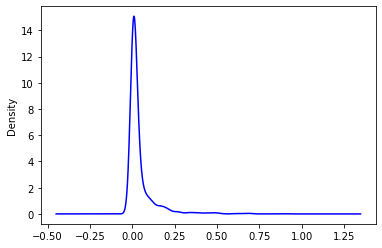

In [ ]:
train.click_rate.plot.density(color='blue')

In [ ]:
# Target variable is highly skewed, performing log transformation to reduce it
train['click_rate_log']  = np.log(train['click_rate']+1)

In [ ]:
print(train['click_rate'].skew())
print(train['click_rate_log'].skew())

# we can see the skewness is reduced

4.317743085163305
3.6811416192586184


In [ ]:
# Creating the feature set or train and test and target set

y_train = train['click_rate']
y_train_log = train['click_rate_log']

x_train = train.iloc[:,1:21]
x_test = test.iloc[:,1:21]

In [ ]:
x_train['data'] = 'train'
x_test['data'] = 'test'
all = pd.concat([x_train,x_test])
all.shape

(2650, 21)

In [ ]:
# Creating a seperate column for Saturday and converting weekend to Sunday only
all['sat'] = np.where(all['day_of_week']== 5, 1, 0)
all['is_weekend'] = np.where(all['day_of_week']== 6, 1, 0)

In [ ]:
# Converting time of day to numeric
# The time between morning and noon is less hence using - 3:3:2 gap ( Evening -3 , noon - 6 ,  morning - 8)
all['times_of_day']=all['times_of_day'].replace({'Noon':6, 'Morning':8, 'Evening':3})

# Change the datatype of charecter column
all['sender'] = all['sender'].astype(str)
all['category'] = all['category'].astype(str)
all['product'] = all['product'].astype(str)
all['target_audience'] = all['target_audience'].astype(str)
all['day_of_week'] = all['day_of_week'].astype(str)
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
# Feature Engineering 
# Deriving new column for Total Cta and total paragraph

all['total'] = all['no_of_CTA']*all['mean_CTA_len']
all['par'] = all['body_len']/all['mean_paragraph_len']

In [ ]:
# Drop unique or almost unique column
all = all.drop(['is_price','is_timer'], axis=1)

In [ ]:
x_train = all[all['data'] == 'train'] 
x_test = all[all['data'] == 'test']
                                                                                          
x_train = x_train.drop(['data'], axis=1)
x_test = x_test.drop(['data'], axis=1)

### Now Build the model 1

In [ ]:
from flaml import AutoML
automl_log = AutoML() 

In [ ]:
automl_log.fit(x_train, y_train_log, task="regression",metric='r2',time_budget=5400,estimator_list = ['lgbm'],
          n_splits=10)

[flaml.automl: 08-08 10:19:59] {2444} INFO - task = regression
[flaml.automl: 08-08 10:19:59] {2446} INFO - Data split method: uniform
[flaml.automl: 08-08 10:19:59] {2449} INFO - Evaluation method: cv
[flaml.automl: 08-08 10:19:59] {2568} INFO - Minimizing error metric: 1-r2
[flaml.automl: 08-08 10:19:59] {2708} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 08-08 10:19:59] {3010} INFO - iteration 0, current learner lgbm
[flaml.automl: 08-08 10:19:59] {3143} INFO - Estimated sufficient time budget=2355s. Estimated necessary time budget=2s.
[flaml.automl: 08-08 10:19:59] {3190} INFO -  at 0.3s,	estimator lgbm's best error=0.8811,	best estimator lgbm's best error=0.8811
[flaml.automl: 08-08 10:19:59] {3010} INFO - iteration 1, current learner lgbm
[flaml.automl: 08-08 10:19:59] {3190} INFO -  at 0.6s,	estimator lgbm's best error=0.8811,	best estimator lgbm's best error=0.8811
[flaml.automl: 08-08 10:19:59] {3010} INFO - iteration 2, current learner lgbm
[flaml.automl:

In [ ]:
print(1-automl_log.best_loss)

0.6049133279680484


In [ ]:
# Convert the prediction in original format
test_pred_log = np.exp(automl_log.predict(x_test))-1

## Model 2

#### Each cluster of user can be interested in different sender and different type of category , creating two new feature of concatanating

In [ ]:
all['sender_vs_cluster'] = all['sender']+'vs'+all['target_audience']
all['category_vs_cluster'] = all['category']+'vs'+all['target_audience']      

In [ ]:
x_train = all[all['data'] == 'train'] 
x_test = all[all['data'] == 'test']
                                                                                          
x_train = x_train.drop(['data'], axis=1)
x_test = x_test.drop(['data'], axis=1)

In [ ]:
from flaml import AutoML
automl_log2 = AutoML() 

In [ ]:
automl_log2.fit(x_train, y_train_log, task="regression",metric='r2',time_budget=5400,estimator_list = ['lgbm'],
          n_splits=10)

[flaml.automl: 08-08 11:50:01] {2444} INFO - task = regression
[flaml.automl: 08-08 11:50:01] {2446} INFO - Data split method: uniform
[flaml.automl: 08-08 11:50:01] {2449} INFO - Evaluation method: cv
[flaml.automl: 08-08 11:50:01] {2568} INFO - Minimizing error metric: 1-r2
[flaml.automl: 08-08 11:50:01] {2708} INFO - List of ML learners in AutoML Run: ['lgbm']
[flaml.automl: 08-08 11:50:01] {3010} INFO - iteration 0, current learner lgbm
[flaml.automl: 08-08 11:50:02] {3143} INFO - Estimated sufficient time budget=6973s. Estimated necessary time budget=7s.
[flaml.automl: 08-08 11:50:02] {3190} INFO -  at 0.8s,	estimator lgbm's best error=0.8614,	best estimator lgbm's best error=0.8614
[flaml.automl: 08-08 11:50:02] {3010} INFO - iteration 1, current learner lgbm
[flaml.automl: 08-08 11:50:03] {3190} INFO -  at 1.5s,	estimator lgbm's best error=0.8614,	best estimator lgbm's best error=0.8614
[flaml.automl: 08-08 11:50:03] {3010} INFO - iteration 2, current learner lgbm
[flaml.automl:

In [ ]:
print(1-automl_log2.best_loss)

0.6043860526594482


In [ ]:
test_pred_log2 = np.exp(automl_log2.predict(x_test))-1

### Final Prediction will be average of both the model

In [ ]:
test_pred_final = test_pred_log2*0.5+ test_pred_log*0.5

In [ ]:
ss['click_rate'] = test_pred_final

In [ ]:
ss.to_csv('jobathon_av_final.csv', index=False)